In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('sounds.csv')

In [3]:
train.sample(5)

,avg,desviopadrao,segundomomento,terceiromomento,assimetria,curtose,desviomedio,n_peaks_valleys,avg_n_peaks_valleys,classe
502,-1.300097,1377.186452,1.896644e+06,-1.755637e+07,-0.003889,7.736688,859.553401,30590,5.350834,positive
350,-0.129624,1531.636142,2.345909e+06,-6.825030e+07,-0.018741,4.923495,1061.516907,29451,0.476724,negative
1107,-0.017574,1801.932541,3.246961e+06,-3.495197e+08,-0.059709,7.395830,1103.323201,23538,-0.871782,positive
342,4.011650,3535.172201,1.249746e+07,2.056264e+09,0.043138,0.562168,2765.087826,17213,12.292453,positive
783,3.043542,2110.846883,4.455684e+06,5.616815e+08,0.055394,2.438402,1545.404435,16229,-4.267854,neutral


In [4]:
X = train.drop(['classe'], axis=1)
y = train['classe']

In [5]:
X.head()

,avg,desviopadrao,segundomomento,terceiromomento,assimetria,curtose,desviomedio,n_peaks_valleys,avg_n_peaks_valleys
0,0.475143,1176.098239,1.383207e+06,-8.470356e+07,-0.053280,7.733721,607.126482,19409,12.915400
1,0.209215,1072.620648,1.150515e+06,-8.000061e+07,-0.065412,4.233658,660.401005,18590,2.387520
2,0.243455,1320.069633,1.742584e+06,-5.292785e+07,-0.023562,5.067684,751.342405,15324,-2.983947
3,0.301834,1255.406197,1.576045e+06,4.611416e+06,0.001609,9.471419,633.506611,24749,-11.829124
4,-0.201644,1798.862214,3.235905e+06,-7.901591e+07,-0.013238,3.221882,1072.070181,17460,-14.790951


In [6]:
y.head()

0    positive
1     neutral
2    positive
3    negative
4    negative
Name: classe, dtype: object

# Number of instances

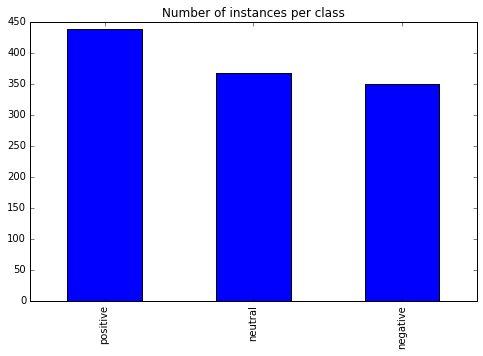

In [7]:
train.classe.value_counts().plot(kind='bar', title = u'Number of instances per class', figsize=(8,5))

# Using KFold as cross validation

In [8]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, random_state=7)

# Split data

In [9]:
from sklearn.model_selection import train_test_split

per_split = 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = per_split, random_state = 11)

# Import confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix

nomes_linhas = ['positive', 'negative', 'neutral']
nomes_cols = ['positive', 'negative', 'neutral']

# Using Logistic Regression as classifier

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

lrc = LogisticRegression()

parameters_lrc = {'penalty': ['l1', 'l2'],
                'max_iter': [10, 20, 30, 50, 100, 200, 500],
                'n_jobs': [-1]
               }

acc_score = make_scorer(accuracy_score)

grid_lrc = GridSearchCV(lrc, parameters_lrc, scoring=acc_score)
grid_lrc = grid_lrc.fit(X, y)

lrc = grid_lrc.best_estimator_

lrc.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Cross validation, folds: 10

In [11]:
results_lrc = cross_val_score(lrc, X, y, cv=kfold)
print (results_lrc.mean())

0.405764617691


# Training set

In [18]:
predicts_lrc = lrc.predict(X)
print (accuracy_score(y, predicts_lrc))

0.439446366782


# Confusion matrix of training set

In [42]:
cm_ts_lrc = pd.DataFrame(confusion_matrix(y, predicts_lrc, labels=['positive', 'negative', 'neutral']), index=nomes_linhas, columns=nomes_cols)
cm_ts_lrc

,positive,negative,neutral
positive,293,20,125
negative,233,23,94
neutral,167,9,192


# Percentage split

In [19]:
lrc.fit(X_train, y_train)
predicts_lrc_split = lrc.predict(X_test)
print (accuracy_score(y_test, predicts_lrc_split))

0.45


# Confusion matrix of split

In [54]:
cm_ts_lrc_s = pd.DataFrame(confusion_matrix(y_test, predicts_lrc_split, labels=['positive', 'negative', 'neutral']), index=nomes_linhas, columns=nomes_cols)
cm_ts_lrc_s

,positive,negative,neutral
positive,5,1,3
negative,3,1,0
neutral,4,0,3


In [63]:
rs_lrc = []
rs_lrc.append(results_lrc.mean())
rs_lrc.append(accuracy_score(y, predicts_lrc))
rs_lrc.append(accuracy_score(y_test, predicts_lrc_split))

# Using Gradient Boosting as classifier

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters_gbc = {'learning_rate': [0.01, 0.1, 0.05],
                  'n_estimators': [100, 250, 500],
                  'max_depth': [3, 5, 10],
                  'max_features': ['auto', 'log2']}

acc_score_gbc = make_scorer(accuracy_score)

grid_gbc = GridSearchCV(gbc, parameters_gbc, scoring=acc_score_gbc)
grid_gbc = grid_gbc.fit(X, y)

gbc = grid_gbc.best_estimator_

gbc.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=250, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

# Cross validation

In [20]:
results_gbc = cross_val_score(gbc, X, y, cv=kfold)
print (results_gbc.mean())

0.424775112444


# Training set

In [21]:
predicts_gbc = gbc.predict(X)
print (accuracy_score(y, predicts_gbc))

0.583044982699


# Confusion matrix of training set

In [55]:
cm_ts_gbc = pd.DataFrame(confusion_matrix(y, predicts_gbc, labels=['positive', 'negative', 'neutral']), index=nomes_linhas, columns=nomes_cols)
cm_ts_gbc

,positive,negative,neutral
positive,334,21,83
negative,169,118,63
neutral,119,27,222


# Percentage split

In [25]:
gbc.fit(X_train, y_train)
predicts_gbc_split = gbc.predict(X_test)
print (accuracy_score(y_test, predicts_gbc_split))

0.5


# Confusion matrix of split

In [56]:
cm_ts_gbc_s = pd.DataFrame(confusion_matrix(y_test, predicts_gbc_split, labels=['positive', 'negative', 'neutral']), index=nomes_linhas, columns=nomes_cols)
cm_ts_gbc_s

,positive,negative,neutral
positive,3,3,3
negative,0,4,0
neutral,2,2,3


In [65]:
rs_gbc = []
rs_gbc.append(results_gbc.mean())
rs_gbc.append(accuracy_score(y, predicts_gbc))
rs_gbc.append(accuracy_score(y_test, predicts_gbc_split))

# Using decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier()

parameters_dtc = {'max_features': ['auto', 'log2'],
                'criterion': ['gini', 'entropy']
               }

acc_score_dtc = make_scorer(accuracy_score)

grid_dtc = GridSearchCV(clf_dtc, parameters_dtc, scoring=acc_score_dtc)
grid_dtc = grid_dtc.fit(X, y)

clf_dtc = grid_dtc.best_estimator_

clf_dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# Cross validation, folds: 10

In [27]:
results_dtc = cross_val_score(clf_dtc, X, y, cv=kfold)
print (results_dtc.mean())

0.367713643178


# Percentage split

In [30]:
clf_dtc.fit(X_train, y_train)
predicts_dtc_split = clf_dtc.predict(X_test)
print (accuracy_score(y_test, predicts_dtc_split))

0.5


# Confusion matrix of split

In [57]:
cm_ts_dtc_s = pd.DataFrame(confusion_matrix(y_test, predicts_dtc_split, labels=['positive', 'negative', 'neutral']), index=nomes_linhas, columns=nomes_cols)
cm_ts_dtc_s

,positive,negative,neutral
positive,3,4,2
negative,1,3,0
neutral,0,3,4


# Using Multilayer Perceptron as classifier

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

clf_mlp = MLPClassifier()

parameters_mlp = {'hidden_layer_sizes': [(5,), (5,2), (8,), (10,), (10,2), (20,2), (20,)], 
              'max_iter': [500, 1000, 1500],
              'learning_rate_init': [0.01, 0.05, 0.10, 0.001, 0.005],
              'momentum': [0.2, 0.5, 0.7, 0.9]
             }

acc_score_mlp = make_scorer(accuracy_score)

grid_mlp = GridSearchCV(clf_mlp, parameters_mlp, scoring=acc_score_mlp)
grid_mlp = grid_mlp.fit(X, y)

clf_mlp = grid_mlp.best_estimator_

clf_mlp.fit(X, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='constant',
       learning_rate_init=0.05, max_iter=500, momentum=0.7,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# Cross validation, folds: 10

In [38]:
results_mlp = cross_val_score(clf_mlp, X, y, cv=kfold)
print (results_mlp.mean())

0.346836581709


# Training set

In [35]:
predicts_mlp = clf_mlp.predict(X)
print (accuracy_score(y, predicts_mlp))

0.372837370242


# Confusion matrix of training set

In [58]:
cm_ts_mlp = pd.DataFrame(confusion_matrix(y, predicts_mlp, labels=['positive', 'negative', 'neutral']), index=nomes_linhas, columns=nomes_cols)
cm_ts_mlp

,positive,negative,neutral
positive,416,10,12
negative,337,10,3
neutral,358,5,5


# Percentage split

In [34]:
clf_mlp.fit(X_train, y_train)
predicts_mlp_split = clf_mlp.predict(X_test)
print (accuracy_score(y_test, predicts_mlp_split))

0.4


# Confusion matrix of split

In [59]:
cm_ts_mlp_s = pd.DataFrame(confusion_matrix(y_test, predicts_mlp_split, labels=['positive', 'negative', 'neutral']), index=nomes_linhas, columns=nomes_cols)
cm_ts_mlp_s

,positive,negative,neutral
positive,8,1,0
negative,4,0,0
neutral,7,0,0


In [66]:
rs_mlp = []
rs_mlp.append(results_mlp.mean())
rs_mlp.append(accuracy_score(y, predicts_mlp))
rs_mlp.append(accuracy_score(y_test, predicts_mlp_split))

# Feature importances

In [60]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[ 0.11569577  0.09964741  0.09533758  0.10307961  0.11212254  0.10714687
  0.11476682  0.1444719   0.1077315 ]


# Accuracy table

In [79]:
t.index = ['logistic_regression', 'gradient_boosting', 'multilayer_perceptron']
t.columns = ['cross_validation', 'training_set', 'percentage_split']
t

,cross_validation,training_set,percentage_split
logistic_regression,0.405765,0.439446,0.45
gradient_boosting,0.424775,0.583045,0.50
multilayer_perceptron,0.346837,0.372837,0.40
